# Video Analysis Using OpenCV and NumPy

## Task 1

### Loading Libraries and Video File

In [1]:
# Import NumPy library, which is used for numerical operations in Python.
import numpy as np

# Import OpenCV library, which stands for Open Source Computer Vision, used for image and video processing.
import cv2

# Import matplotlib.pyplot library, used for visualizing data, including images and plots.
import matplotlib.pyplot as plt

# Set the video file path to the variable VFILE.
VFILE = "video/manila_1945.mp4"

# Note: The video file is available for sharing and is available at: 
# https://archive.org/details/57674TripToManilaMos

### Implementing Video Reader Generator

In [2]:
# When dealing with large video files, it's important to avoid reading the entire video into memory at once,
# as it may not fit into memory and cause performance issues. Instead, we use a generator function to read
# one video frame at a time, processing it sequentially.

# Define a generator function named 'get_frames' that takes 'filename' as input.
def get_frames(filename):
    # Create a VideoCapture object 'video' to open the video file for reading.
    video = cv2.VideoCapture(filename)

    # Use a while loop to continuously read frames from the video until it's open.
    while video.isOpened():
        # Read the next video frame.
        ret, frame = video.read()

        # If 'ret' is True, the frame was read successfully.
        if ret:
            # Yield the current frame to the caller. 'yield' turns this function into a generator,
            # returning one frame at a time, but preserving the function state for the next call.
            yield frame
        else:
            # If 'ret' is False, it means there are no more frames to read in the video,
            # so we break the loop and stop the generator.
            break

    # Release the VideoCapture object to free up resources.
    video.release()

    # After the loop ends, yield 'None' to signal the end of the generator and stop iteration.
    # This helps to avoid raising StopIteration errors when the generator is exhausted.
    yield None

__Note:__ This generator function, `get_frames`, efficiently reads video frames one at a time using OpenCV's VideoCapture object. By using a generator, we can process large video files without loading the entire video into memory, which is especially crucial when working with videos that may be too large to fit into RAM. When using this function, we can simply iterate over it in a loop, and it will yield one frame at a time until all frames have been processed.

## Task 2

### Fetching and Visualizing Video Frames

In [3]:
# Use a for loop to iterate over the frames generated by the 'get_frames' function.
# 'VFILE' contains the path to the video file we want to process.

# Loop through each frame in the video using the generator 'get_frames(VFILE)'.
for f in get_frames(VFILE):
    # If 'f' is None, it means there are no more frames to process, so we break the loop.
    if f is None:
        break

    # Display the current frame using OpenCV's 'imshow' function.
    # The first argument is the window name, which will be displayed at the top of the window.
    # The second argument is the frame to be displayed.
    cv2.imshow('frame', f)

    # Wait for a short time (10 milliseconds) and check for the 'Esc' key press (ASCII code 27).
    # If the 'Esc' key is pressed, we break the loop to stop displaying frames.
    if cv2.waitKey(10) == 27:
        break

# After the loop ends, close all OpenCV windows using 'destroyAllWindows'.
# This is necessary to release any resources held by the windows.
cv2.destroyAllWindows()

__Note:__ In this code, we use the '`get_frames`' generator to retrieve video frames one by one and display them using OpenCV's 'imshow' function. The frames are displayed one after another until the 'Esc' key (ASCII code 27) is pressed or all frames have been processed. This code allows us to visualize the video frames and interact with the video player window while processing the video in real-time. The 'destroyAllWindows' function ensures that all windows are closed after the loop ends, releasing any associated resources.

### Creating a Function to Obtain a Single Video Frame

In [4]:
# Define a function named 'get_frame' that takes 'filename' and 'index' as inputs.
def get_frame(filename, index):
    # Initialize a counter to keep track of the frames processed.
    counter = 0

    # Create a VideoCapture object 'video' to open the video file for reading.
    video = cv2.VideoCapture(filename)

    # Use a while loop to continuously read frames from the video until it's open.
    while video.isOpened():
        # Read the next video frame.
        ret, frame = video.read()

        # If 'ret' is True, the frame was read successfully.
        if ret:
            # Check if the current frame's index matches the desired index.
            if counter == index:
                # Return the frame if the index matches.
                return frame

            # Increment the counter to move to the next frame.
            counter += 1
        else:
            # If 'ret' is False, it means there are no more frames to read in the video,
            # so we break the loop and return None to indicate that the desired index is out of range.
            break

    # Release the VideoCapture object to free up resources.
    video.release()

    # If the desired index is out of range, return None.
    return None

__Note:__ The function, `get_frame`, is used to retrieve a single video frame at a specific index from the input video file. It first opens the video using the VideoCapture object and then iterates through the frames until it finds the frame corresponding to the specified index. Once it finds the frame, it returns it to the caller. If the index is out of range or the video file cannot be opened, the function returns None.

By using this function, we can extract and process specific frames from the video without loading the entire video into memory. This can be useful for tasks such as frame-by-frame analysis or object detection at specific timestamps in the video.

### Analyzing Pixels in Video Frames

In [5]:
# Using the 'get_frame' function to retrieve a specific frame from the video file.
# We pass the video file path 'VFILE' and the desired frame index '80' as arguments.
frame = get_frame(VFILE, 80)

# Printing the shape of the 'frame' array, which represents the dimensions of the frame.
# The shape will be in the format (height, width, channels).
# 'height' represents the number of rows (vertical pixels), 'width' represents the number of columns (horizontal pixels),
# and 'channels' represents the number of color channels (e.g., 3 for RGB).
print('shape ', frame.shape)

# Printing the pixel value at position (0,0) in the frame.
# The format of the pixel value will depend on the number of color channels.
# For example, if the image is in RGB format, the pixel value will be an array containing 3 values (R, G, B).
print('pixel at (0,0)', frame[0, 0, :])

# Printing the pixel value at position (150,75) in the frame.
# This will provide the pixel value for the specified row (150) and column (75).
# Again, the pixel value will be an array of color channel values.
print('pixel at (150,75)', frame[150, 75, :])


shape  (360, 640, 3)
pixel at (0,0) [0 0 0]
pixel at (150,75) [0 0 0]


__Note:__ Our video frame is stored as a 3D array of numbers.
The first two indices give you the position, the row
number and the column number. Each pixel requires three
numbers,
the values for red, green and blue color components.
We might have learned elsewhere that the computer displays
colors by mixing different amounts of these three basic
colors.

Here's an important detail - *because we used OpenCV to
retrieve the video frame the way it stores these pixel values
is __not RGB__, but __BGR__.*

That is why, in our first pixel, the first value here is color.
__47__ for the blue channel, __19__ for the green and __zero__ for the
red. So that's the convention used by OpenCV.

### Displaying Individual Video Frame

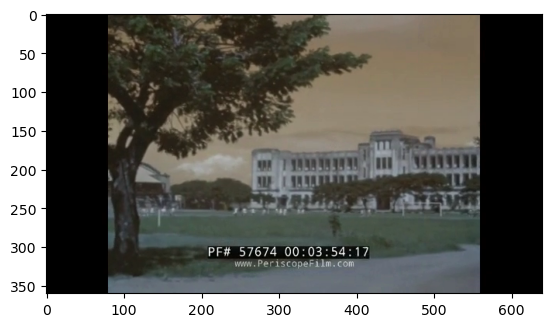

In [6]:
# Using 'plt.imshow()' to display the 'frame' obtained from the video file.
# 'plt.imshow()' is a function from the 'matplotlib.pyplot' library used to display images.
plt.imshow(frame)

# The 'frame' array contains the pixel values of the video frame that we want to display.
# 'plt.imshow()' takes the 'frame' array as input and visualizes it as an image.

# Note: Before running this code, ensure that 'frame' is properly obtained using the 'get_frame' function.
# If 'frame' is not defined or is None, this code will raise an error.

# The image will be displayed using the default colormap, which maps the pixel values to colors.
# For RGB images, the colors will be interpreted as red, green, and blue intensities.

# The displayed image will be shown inside the Jupyter Notebook cell output.
# If you're running the code outside of Jupyter Notebook, 'plt.show()' might be needed to display the image.

In the image above, the colors are wrong. This scene should be mostly shades of blue.
The reason is because we used OpenCV to obtain the video frame.
It stores pixel values in the order blue, green, red and we
used matplotlib, a different package, to display the frame.
This one expects pixel values to be stored in the opposite
order: red, green, blue.

## Task 3

### Correcting Color Convention

pixel at (0,0) [0 0 0]


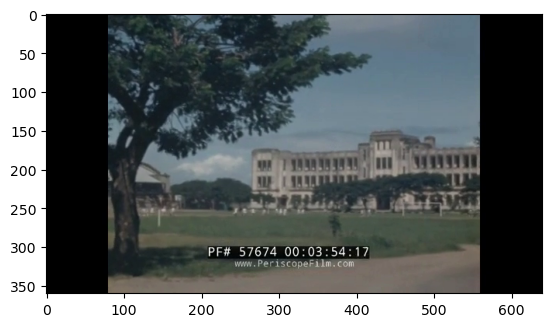

In [7]:
# The 'cv2.cvtColor()' function is used to convert the color space of an image.
# We pass the 'frame' array as the first argument and 'cv2.COLOR_BGR2RGB' as the second argument.
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# 'cv2.COLOR_BGR2RGB' is the color conversion code to change from BGR to RGB color space.

# The 'print' statement shows the pixel value at position (0,0) in the 'fix_frame'.
print('pixel at (0,0)', fix_frame[0, 0, :])
# After converting to the RGB color space, the pixel value will be in the order (R, G, B).

# Finally, we use 'plt.imshow()' again to display the 'fix_frame'.
plt.imshow(fix_frame)
# This time, the image will be displayed with the correct color convention (RGB).

__Note:__ In this code, we use `cv2.cvtColor()` to fix the color convention of the `frame` obtained from the video file. As mentioned earlier, OpenCV uses the BGR (Blue, Green, Red) color convention by default, while `plt.imshow()` expects the RGB (Red, Green, Blue) color convention for proper visualization. To ensure that the image is displayed correctly, we use `cv2.cvtColor()` to convert the color space of the `frame` from BGR to RGB.

After the conversion, the `fix_frame` array will have the correct RGB color convention, and the image displayed by `plt.imshow()` will show the colors as intended.

### Cropping Video Frames

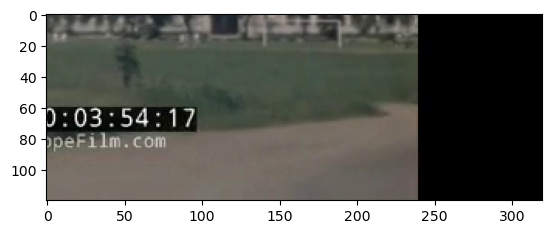

In [8]:
# Using array slicing to crop a region of interest (ROI) from the 'fix_frame' obtained in the previous step.
plt.imshow(fix_frame[240:480, 320:640])

# The first slice '240:480' represents the range of rows (vertical pixels) to include in the cropped frame.
# It means we are selecting rows from index 240 (inclusive) to index 479 (exclusive), i.e., a height of 240 pixels.

# The second slice '320:640' represents the range of columns (horizontal pixels) to include in the cropped frame.
# It means we are selecting columns from index 320 (inclusive) to index 639 (exclusive), i.e., a width of 320 pixels.

__Note:__ In this code, we use array slicing to crop a region of interest (ROI) from the `fix_frame` obtained in the previous step. The slicing `fix_frame[240:480, 320:640]` specifies the range of rows and columns to include in the cropped frame. The cropped frame will contain a specific region of the original `fix_frame` defined by the ROI.

### Modifying Brightness

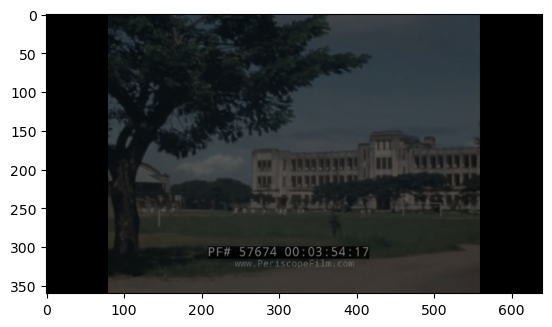

In [9]:
# Multiplying the 'fix_frame' array by 0.5 to make the image darker.
# This operation reduces the intensity of all pixel values, making the image appear darker.
darker = 0.5 * fix_frame

# Converting the 'darker' array to the data type 'uint8'.
# The 'uint8' data type represents unsigned 8-bit integers with values from 0 to 255.
# This is necessary because 'plt.imshow()' expects the pixel values to be in the range [0, 255].
# If we don't convert to 'uint8', the image might not be displayed correctly.
darker = darker.astype(np.uint8)

# Displaying the darker image using 'plt.imshow()'.
# The image will appear darker than the original 'fix_frame' due to the brightness adjustment.
plt.imshow(darker)

## Task 4

### Drawing Circles on Video Frames

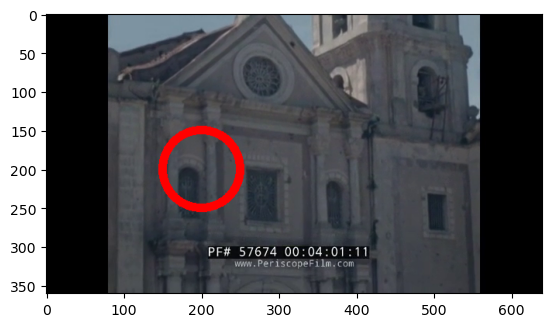

In [10]:
# Using the 'get_frame' function to retrieve a specific frame from the video file.
# We pass the video file path 'VFILE' and the desired frame index '200' as arguments.
frame = get_frame(VFILE, 200)

# Drawing a circle on the 'frame' using the 'cv2.circle()' function.
# The 'cv2.circle()' function is used to draw a circle on an image.
cv2.circle(frame, # - 'frame': The image on which the circle will be drawn.
           center = (200, 200), # - 'center': The center coordinates of the circle (x, y).
           radius = 50, # - 'radius': The radius of the circle in pixels.
           color = (0 , 0 , 255), # - 'color': The color of the circle in BGR format (Blue, Green, Red).
           thickness = 10)# - 'thickness': The thickness of the circle's outline.
# In this case, a circle with a center at (200, 200) and a radius of 50 pixels is drawn on the 'frame'.
# The circle will have a red color (BGR value of (0, 0, 255)) and a thickness of 10 pixels.

# Converting the 'frame' array to the data type 'uint8' and fixing the color convention to RGB.
# This is necessary to display the circle correctly using 'plt.imshow()'.
fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Displaying the 'fixed_frame' with the drawn circle using 'plt.imshow()'.
# The circle will be visible on the image at the specified coordinates and with the specified color and thickness.
plt.imshow(fixed_frame)

### Processing Complete Video

In [11]:
# Initializing the 'counter' variable to keep track of the frame number.
counter = 0

# Using a for loop to iterate over all the frames in the video using the 'get_frames' generator.
for frame in get_frames(VFILE):
    # If 'frame' is None, it means there are no more frames to process, so we break the loop.
    if frame is None:
        break

    # Adding the frame number to the video frame using the 'cv2.putText()' function.
    # The 'cv2.putText()' function is used to draw text on an image.
    cv2.putText(frame, # - 'frame': The image on which the text will be drawn.
                text=str(counter), # - 'text': The text to be drawn on the frame (in this case, the frame number as a string).
                org=(100, 100), # - 'org': The coordinates (x, y) where the text will be drawn on the frame.
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, # - 'fontFace': The font type for the text.
                fontScale=1, # - 'fontScale': The font size scale factor.
                color=(0, 255, 0), # - 'color': The color of the text in BGR format (Blue, Green, Red).
                thickness=3) # - 'thickness': The thickness of the text.    

    # Here, we draw the frame number (counter value) at the position (100, 100) on each frame.
    # The text will be displayed in green color (BGR value of (0, 255, 0)) with a thickness of 3 pixels.

    # Displaying the current frame with the frame number using 'cv2.imshow()'.
    cv2.imshow('frame', frame)

    # Wait for a short time (10 milliseconds) and check for the 'Esc' key press (ASCII code 27).
    # If the 'Esc' key is pressed, we break the loop to stop displaying frames.
    if cv2.waitKey(10) == 27:
        break

    # Increment the 'counter' to move to the next frame.
    counter += 1

# After processing all frames, close all OpenCV windows using 'cv2.destroyAllWindows()'.
# This is necessary to release any resources held by the windows.
cv2.destroyAllWindows()

# Additional comments:
# - Between opencv 'imshow' and matplotlib 'imshow', use the matplotlib's if it's only one frame.
# - The result of this code is a video frame playback with the frame numbers superimposed on top of the video.
# - The 'counter' variable helps keep track of the frame number as frames are displayed.

## Task 5

### Creating a New Video Output

In [12]:
# Using 'cv2.VideoWriter_fourcc()' to create a FourCC code for the video codec.
# FourCC is a 4-byte code used to specify the video codec for writing video files.
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
# In this case, the FourCC code is created for the MP4V codec.
# The 'M', 'P', '4', and 'V' are the FourCC codes for the MP4V codec.

# The new video file will be named "new.mp4", use the MP4V codec, have 20 FPS, and each frame will be of size 640x360 pixels.
video_out = cv2.VideoWriter("new_output.mp4", fourcc, 20, (640,360))

# Initializing the 'counter' variable to keep track of the frame number.
counter = 0

# Using a for loop to iterate over all the frames in the video using the 'get_frames' generator.
for frame in get_frames(VFILE):
    # If 'frame' is None, it means there are no more frames to process, so we break the loop.
    if frame is None:
        break
    # Adding the frame number to the video frame using the 'cv2.putText()' function.
    cv2.putText(frame,
                text = str(counter),
                org = (100, 100),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 1,
                color = (0, 255, 0),
                thickness = 3)
    # Writing the current frame to the new video file using 'video_out.write(frame)'.
    video_out.write(frame)
    # Increment the 'counter' to move to the next frame.
    counter += 1
# Release the new video file for writing to save and finalize it.
video_out.release()

__Note:__ In this code, we generate a new video file named `"new.mp4`" containing the original video frames with superimposed frame numbers. The '`cv2.VideoWriter_fourcc()`' function is used to create a FourCC code for the MP4V codec, which will be used to specify the video codec for writing the new video file.

The '`cv2.VideoWriter()`' function is then used to create the new video file for writing. It takes the video file name ("`new.mp4`"), the FourCC code for the codec, the frames per second (FPS) for the new video, and the frame size (width, height) as input parameters.

The '`for`' loop iterates through each frame using the '`get_frames`' generator, and for each frame, it adds the frame number to the frame using '`cv2.putText()`'. The modified frames are then written to the new video file using '`video_out.write(frame)`'.

After processing all frames, the new video file is released using '`video_out.release()`', which saves and finalizes the video file. The result is a new video file named "`new.mp4`" with the original video frames, and each frame will have the frame number superimposed on it.

### Determining Total Frame Count

In [13]:
# Create a VideoCapture object 'video' to open the video file for reading.
video = cv2.VideoCapture(VFILE)

# Get the total number of frames in the video using 'video.get(cv2.CAP_PROP_FRAME_COUNT)'.
# The 'cv2.CAP_PROP_FRAME_COUNT' property returns the total number of frames in the video.

# Convert the frame count to an integer using 'int()' since 'cv2.CAP_PROP_FRAME_COUNT' returns a float.
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Release the VideoCapture object to free up resources.
video.release()

# Print the total frame count of the video.
print('frame count ', count)

frame count  3252


__Note:__ In this code, we find the total number of frames in the video file. We use the '`cv2.VideoCapture()`' function to open the video file for reading, and then we use '`video.get(cv2.CAP_PROP_FRAME_COUNT)`' to retrieve the total frame count property of the video. Since '`cv2.CAP_PROP_FRAME_COUNT`' returns a float, we convert it to an integer using '`int()`' to get the exact count.

After getting the frame count, we release the `VideoCapture` object to free up the resources used for reading the video file. Finally, we print the total frame count of the video using '`print()`'.

## Task 6

### Building a Collage from Video Frames

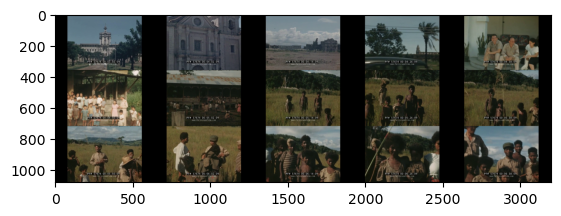

In [14]:
# Calculate the number of frames to skip when creating the collage.
# The 'skip_frames' variable is determined by dividing the total frame count by 15 using '//' (integer division).
skip_frames = count // 15

# Create an empty list 'frames' to store selected frames for the collage.
frames = []

# Initialize the 'counter' variable to keep track of the frame number.
counter = 0

# Iterate through each frame in the video using the 'get_frames' generator.
for f in get_frames(VFILE):
    # If the current frame number is divisible by 'skip_frames', add the frame to the 'frames' list.
    # This step selects frames at regular intervals to include in the collage.
    if counter % skip_frames == 0:
        frames.append(f)

    # Increment the 'counter' to move to the next frame.
    counter += 1

# Concatenate the frames horizontally to create the first row of the collage.
row1 = np.concatenate(frames[0:5], axis=1)

# Concatenate the frames horizontally to create the second row of the collage.
row2 = np.concatenate(frames[5:10], axis=1)

# Concatenate the frames horizontally to create the third row of the collage.
row3 = np.concatenate(frames[10:15], axis=1)

# Concatenate the three rows vertically to create the final collage.
collage = np.concatenate((row1, row2, row3), axis=0)

# Convert the collage array to the RGB color convention using 'cv2.cvtColor()'.
collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)

# Display the final collage using 'plt.imshow()'.
plt.imshow(collage)

__Note:__ In this code, we create a collage by selecting frames from the video at regular intervals to form rows, and then we concatenate these rows to form the final collage. The number of frames to skip for collage creation is calculated by dividing the total frame count by 15, and the '`skip_frames`' variable stores this value.

We use a loop to iterate through each frame using the '`get_frames`' generator, and at each step, we check if the current frame number is divisible by '`skip_frames`'. If it is, we add the frame to the '`frames`' list. This process selects frames at regular intervals to include in the collage.

After selecting the frames, we concatenate them horizontally to form the three rows of the collage: '`row1`', '`row2`', and '`row3`'. Then, we concatenate these three rows vertically to create the final collage array named '`collage`'. The '`collage`' array is then converted to the RGB color convention using '`cv2.cvtColor()`' since '`plt.imshow()`' expects images in RGB format.

Finally, we display the final collage using '`plt.imshow()`', showing the selected frames arranged in rows to create the video collage.

## Conclusion

In conclusion, this project utilized __OpenCV__ and __NumPy__ to efficiently analyze and process video content in a Jupyter Notebook. By employing various techniques such as frame retrieval, pixel examination, brightness adjustment, and collage creation, the project demonstrated how to manipulate and visualize video frames effectively. The collaboration between __OpenCV__ and __NumPy__ provided powerful tools for video analysis, enabling tasks like object detection, tracking, and video summarization. This project serves as a solid foundation for further exploration and application of computer vision techniques in video processing and paves the way for exciting possibilities in the field of data science.